<a href="https://colab.research.google.com/github/Pranayshukla0610/ML-projects-portfolio/blob/main/Logistic_Regression_On_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50558 entries, 0 to 50557
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             50558 non-null  int64  
 1   trans_date_trans_time  50558 non-null  object 
 2   cc_num                 50558 non-null  int64  
 3   merchant               50558 non-null  object 
 4   category               50558 non-null  object 
 5   amt                    50558 non-null  float64
 6   first                  50558 non-null  object 
 7   last                   50558 non-null  object 
 8   gender                 50558 non-null  object 
 9   street                 50558 non-null  object 
 10  city                   50558 non-null  object 
 11  state                  50558 non-null  object 
 12  zip                    50558 non-null  int64  
 13  lat                    50558 non-null  float64
 14  long                   50558 non-null  float64
 15  ci

In [4]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,50558.000000,5.055800e+04,50558.000000,50558.000000,50558.000000,50558.000000,5.055800e+04,5.055700e+04,50557.000000,50557.000000,50557.000000
mean,25278.500000,4.162185e+17,69.454023,48703.069109,38.527480,-90.130006,9.080840e+04,1.372545e+09,38.525261,-90.128778,0.003976
std,14594.981792,1.307443e+18,151.533502,26787.391363,5.080837,13.623316,3.054265e+05,4.398601e+05,5.116321,13.635990,0.062928
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.042320,-166.646251,0.000000
25%,12639.250000,1.800429e+14,9.732500,26237.000000,34.590600,-96.743000,7.430000e+02,1.372158e+09,34.712267,-96.803813,0.000000
50%,25278.500000,3.518759e+15,46.990000,48088.000000,39.371600,-87.456900,2.456000e+03,1.372535e+09,39.366987,-87.368183,0.000000
75%,37917.750000,4.634956e+15,82.617500,72011.000000,42.014400,-80.175200,2.032800e+04,1.372962e+09,41.974026,-80.249245,0.000000
max,50557.000000,4.992346e+18,13149.150000,99783.000000,65.689900,-67.950300,2.906700e+06,1.373271e+09,66.669356,-66.955602,1.000000


In [12]:
df['Class'].value_counts()

,count
Class,
0.0,23769
1.0,88


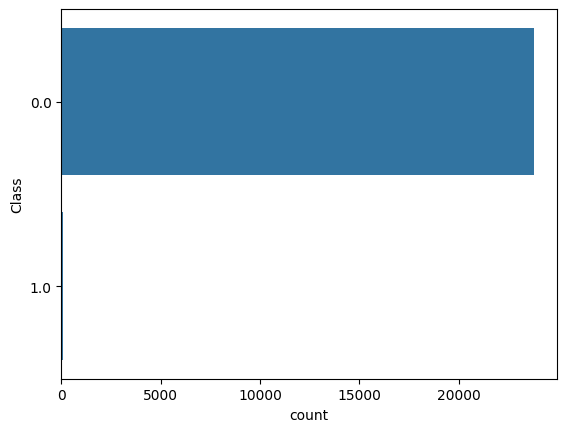

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y='Class', data=df)
plt.show()

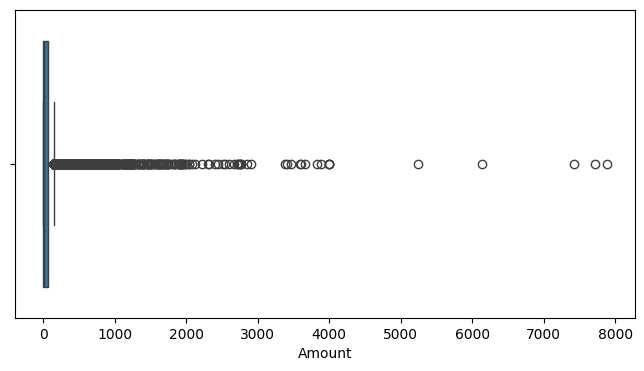

In [14]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Amount'])
plt.show()

In [15]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)

IQR = Q3 - Q1

df = df[(df['Amount'] > Q1 - 1.5 * IQR) &
        (df['Amount'] < Q3 + 1.5 * IQR)]

In [16]:
df['LogAmount'] = np.log1p(df['Amount'])

In [17]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,LogAmount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,5.014760
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,1.305626
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,4.824306
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,4.262539
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0,1.541159


In [18]:
df['Hour'] = df['Time']//3600.0

In [19]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,LogAmount,Hour
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,5.014760,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,1.305626,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,4.824306,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,4.262539,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0,1.541159,0.0


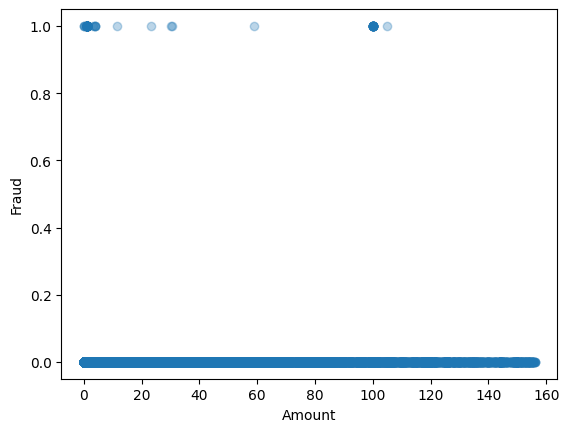

In [20]:
plt.scatter(df['Amount'],df['Class'],alpha=0.3)
plt.xlabel('Amount')
plt.ylabel('Fraud')
plt.show()

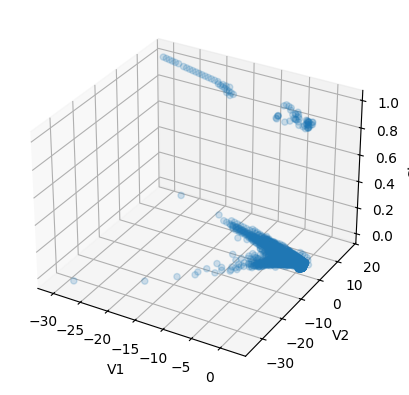

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df['V1'],
    df['V2'],
    df['Class'],
    alpha=0.2
)

ax.set_xlabel('V1')
ax.set_ylabel('V2')
ax.set_zlabel('Class')
plt.show()

In [23]:
X = df.drop('Class', axis=1)
y = df['Class']

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [25]:
from sklearn.utils import resample

df_majority = df[df['Class'] == 0]
df_minority = df[df['Class'] == 1]

df_minority_unsampled = resample(
    df_minority,
    replace=True,
    n_samples = len(df_majority),
    random_state=42
)

df_balanced = pd.concat([df_majority,df_minority_unsampled])

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9990625732364659
[[4248    2]
 [   2   15]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4250
         1.0       0.88      0.88      0.88        17

    accuracy                           1.00      4267
   macro avg       0.94      0.94      0.94      4267
weighted avg       1.00      1.00      1.00      4267



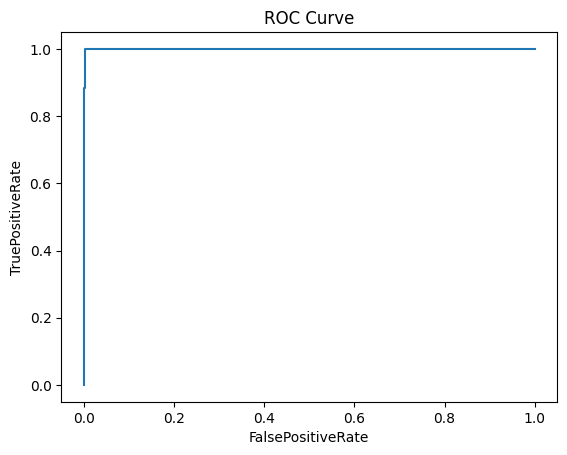

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc = roc_auc_score(y_test,y_pred)

plt.plot(fpr,tpr)
plt.xlabel('FalsePositiveRate')
plt.ylabel('TruePositiveRate')
plt.title('ROC Curve')
plt.show()

In [34]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert back to DataFrame if needed
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train)

X_vif = sm.add_constant(X_train)

vif = pd.DataFrame()
vif["feature"] = X_vif.columns
vif["VIF"] = [
    variance_inflation_factor(X_vif.values, i)
    for i in range(X_vif.shape[1])
]

vif

,feature,VIF
0,const,1.000274
1,0,110.945201
2,1,7.774686
3,2,19.605995
4,3,7.341498
5,4,2.529156
6,5,9.677798
7,6,4.231947
8,7,13.361505
9,8,2.750146


In [35]:
model_l2 = LogisticRegression(penalty='l2', solver='liblinear')
model_l2.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [36]:
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')